---

## **MACHINE LEARNING PROJECT -** ***Sentiment analysis on Amazon food reviews*** 

---

## **GROUP MEMBERS :**

#### Amith PS - CB.SC.I5DAS18003
#### Karthik Raj VP - CB.SC.I5DAS18016
#### Linci Felicita P - CB.SC.I5DAS18022
#### Parameshwari S - CB.SC.I5DAS18026

##**1. Importing libraries**

In [ ]:
pip install scikit-plot

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, auc, roc_curve
from sklearn import model_selection
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


from sklearn.metrics import classification_report
from scikitplot.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

##**2. Reading the dataset**

In [ ]:
df = pd.read_csv("/content/preprocessed.csv")
df = df.sample(frac = 1)
df.head()

,Unnamed: 0,Unnamed: 0.1,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Date,Year,Target,Cleaned_text
84612,51979,51979,519649,B006N3I1HM,AM2WKUD1MX49L,Sandito Gordito,2,3,5,1293235200,Upset with Amazon,I have a standing order with Amazon for some t...,2010-12-25,2010,Positive,stand order amazon time case k cup ship every ...
105088,12457,12457,124248,B005ZBZM52,#oc-R2QRIFHKMX74HY,J. Walters,0,0,3,1339804800,"Coffee great, Cup does not fit Keurig machine ...",A friend gave a few cups of this to try. Coff...,2012-06-16,2012,Neutral,friend give cup try coffee great cup not fit k...
119339,6520,6520,65844,B0007A0AQW,A9HHQGTZV1P8D,"Mrs. Spates ""amayasmom2003""",0,0,3,1334016000,"Smells Aweful, but Jimmy Loves It",I can't stand the smell of this treat. They a...,2012-04-10,2012,Neutral,not stand smell treat bite size tiny little be...
40573,36162,36162,361535,B002AQJN1E,A3DMCALF7N395M,Lynn Pozz,1,1,2,1320710400,Can't say I liked this one,I didn't like the taste of this hazelnut stevi...,2011-11-08,2011,Negative,not like taste hazelnut stevia not like sweetl...
70334,33719,33719,337974,B004LWEUKO,A3U30FKFTAUPZR,P. Karmazin,0,0,5,1334707200,Very good,My dogs love and are staying very healthy. I ...,2012-04-18,2012,Positive,dog love stay healthy keep buying excellent pr...


In [ ]:
df.shape

(132437, 16)

In [ ]:
X = df['Cleaned_text']
y = df['Target']

##**3. Train-Test split**

In [ ]:
x_training, x_test, y_training, y_test= train_test_split(X, y, test_size=0.25)
x_train, x_cv, y_train, y_cv = train_test_split(x_training, y_training, test_size=0.3)

In [ ]:
print("The shape of the training data is:", x_train.shape, y_train.shape)
print("The shape of the CV data is:", x_cv.shape, y_cv.shape)
print("The shape of the test data is:", x_test.shape, y_test.shape)

The shape of the training data is: (69528,) (69528,)
The shape of the CV data is: (29799,) (29799,)
The shape of the test data is: (33110,) (33110,)


##**4. Vectorization**

## BOW vectorizer

In [ ]:
count_vect = CountVectorizer(ngram_range=(1,2))
count_vect.fit(x_train)

x_train_bow = count_vect.transform(x_train)
x_cv_bow = count_vect.transform(x_cv)
x_test_bow = count_vect.transform(x_test)

In [ ]:
print("The shape of the training data is:", x_train_bow.shape, y_train.shape)
print("The shape of the CV data is:", x_cv_bow.shape, y_cv.shape)
print("The shape of the test data is:", x_test_bow.shape, y_test.shape)

The shape of the training data is: (69528, 598798) (69528,)
The shape of the CV data is: (29799, 598798) (29799,)
The shape of the test data is: (33110, 598798) (33110,)


## Tfidf vectorizer

In [ ]:
tfidf_vect = TfidfVectorizer(stop_words=None, ngram_range=(1,2))
tfidf_vect.fit(x_train)

x_train_tfidf = tfidf_vect.transform(x_train)
x_cv_tfidf = tfidf_vect.transform(x_cv)
x_test_tfidf = tfidf_vect.transform(x_test)

In [ ]:
print("The shape of the training data is:", x_train_tfidf.shape, y_train.shape)
print("The shape of the CV data is:", x_cv_tfidf.shape, y_cv.shape)
print("The shape of the test data is:", x_test_tfidf.shape, y_test.shape)

The shape of the training data is: (69528, 598798) (69528,)
The shape of the CV data is: (29799, 598798) (29799,)
The shape of the test data is: (33110, 598798) (33110,)


##**5. Evaluation**

---

## **Naive Bayes Classifier** 

---

In [ ]:
def nb_train(x_train, x_cv, y_train, y_cv, alg):
    alpha = [10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001,0.000005,0.000001]
    accuracy_cv = []

    for i in alpha[0:]:
        if (alg == 'Multinomial'):
            nb = MultinomialNB(alpha=i)
        elif (alg == 'Bernoulli'):
            nb = BernoulliNB(alpha=i)
        nb.fit(x_train, y_train)
        prediction = nb.predict(x_cv)
        acc_cv = accuracy_score(y_cv, prediction)
        accuracy_cv.append(acc_cv)
    opt_alpha = alpha[accuracy_cv.index(max(accuracy_cv))]
    x = pd.DataFrame()
    x['Alpha'] = alpha
    x['Accuracy'] = accuracy_cv
    print(x)
            
    plt.plot(alpha, accuracy_cv, 'b-', label="Cross Validation Data")
    plt.legend(loc='lower right')
    plt.title("alpha vs Auc Score")
    plt.ylabel('Auc Score')
    plt.xlabel('alpha')
    plt.show()
    return opt_alpha

In [ ]:
def nb_test(x_train, y_train, x_test, y_test, optimal_alpha, alg):
    if (alg == 'Multinomial'):
        nb = MultinomialNB(alpha=optimal_alpha)
    elif (alg == 'Bernoulli'):
        nb = BernoulliNB(alpha=optimal_alpha)
    nb.fit(x_train, y_train)
    
    prediction = nb.predict(x_test)

    print("The accuracy of the model is:", accuracy_score(y_test, prediction)*100)
    plot_confusion_matrix(y_test, prediction)
    plt.show()
    return accuracy_score(y_test, prediction)*100

        Alpha  Accuracy
0   10.000000  0.820732
1    5.000000  0.869895
2    1.000000  0.941743
3    0.500000  0.957415
4    0.100000  0.972516
5    0.050000  0.974764
6    0.010000  0.976174
7    0.005000  0.977046
8    0.001000  0.977415
9    0.000500  0.977449
10   0.000100  0.977684
11   0.000050  0.977516
12   0.000010  0.977650
13   0.000005  0.977550
14   0.000001  0.977348


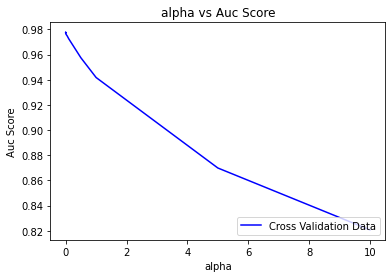

In [ ]:
a1 = nb_train(x_train_bow, x_cv_bow, y_train, y_cv, alg='Multinomial')

The accuracy of the model is: 97.64421624886741


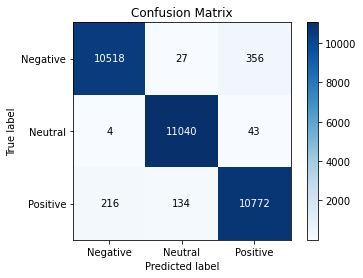

In [ ]:
b1 = nb_test(x_train_bow, y_train, x_test_bow, y_test, optimal_alpha=a1, alg='Multinomial')

        Alpha  Accuracy
0   10.000000  0.746334
1    5.000000  0.835968
2    1.000000  0.934830
3    0.500000  0.953488
4    0.100000  0.972415
5    0.050000  0.974999
6    0.010000  0.977818
7    0.005000  0.978321
8    0.001000  0.979093
9    0.000500  0.979060
10   0.000100  0.979127
11   0.000050  0.978959
12   0.000010  0.978623
13   0.000005  0.978657
14   0.000001  0.978053


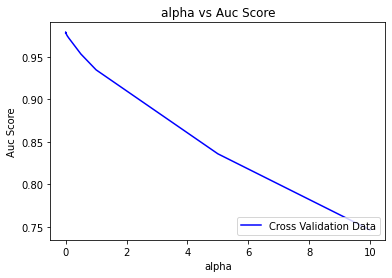

In [ ]:
a2 = nb_train(x_train_bow, x_cv_bow, y_train, y_cv, alg='Bernoulli')

The accuracy of the model is: 97.83449109030504


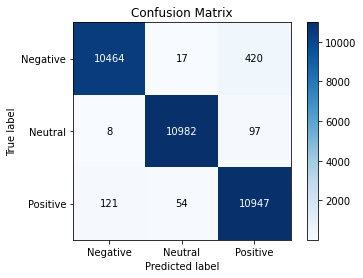

In [ ]:
b2 = nb_test(x_train_bow, y_train, x_test_bow, y_test, optimal_alpha=a2, alg='Bernoulli')

        Alpha  Accuracy
0   10.000000  0.804993
1    5.000000  0.837813
2    1.000000  0.903990
3    0.500000  0.925937
4    0.100000  0.960435
5    0.050000  0.968053
6    0.010000  0.975637
7    0.005000  0.976241
8    0.001000  0.977382
9    0.000500  0.977348
10   0.000100  0.977516
11   0.000050  0.977583
12   0.000010  0.977415
13   0.000005  0.977315
14   0.000001  0.977415


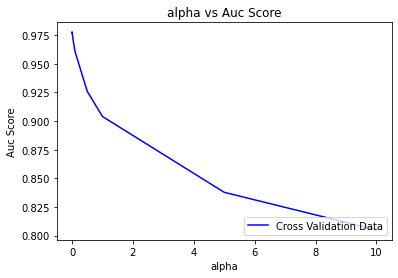

In [ ]:
a3 = nb_train(x_train_tfidf, x_cv_tfidf, y_train, y_cv, alg='Multinomial')

The accuracy of the model is: 97.65327695560254


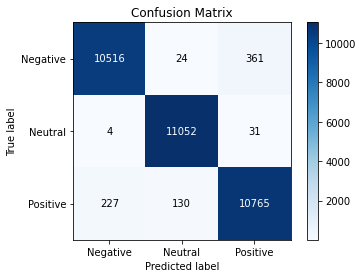

In [ ]:
b3 = nb_test(x_train_tfidf, y_train, x_test_tfidf, y_test, optimal_alpha=a3, alg='Multinomial')

        Alpha  Accuracy
0   10.000000  0.746334
1    5.000000  0.835968
2    1.000000  0.934830
3    0.500000  0.953488
4    0.100000  0.972415
5    0.050000  0.974999
6    0.010000  0.977818
7    0.005000  0.978321
8    0.001000  0.979093
9    0.000500  0.979060
10   0.000100  0.979127
11   0.000050  0.978959
12   0.000010  0.978623
13   0.000005  0.978657
14   0.000001  0.978053


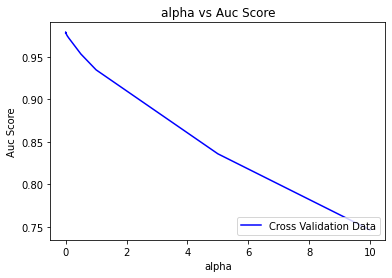

In [ ]:
a4 = nb_train(x_train_tfidf, x_cv_tfidf, y_train, y_cv, alg='Bernoulli')

The accuracy of the model is: 97.83449109030504


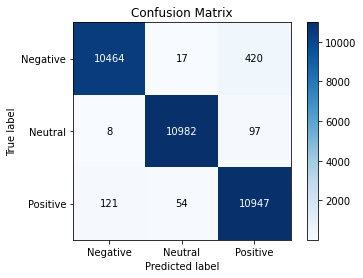

In [ ]:
b4 = nb_test(x_train_tfidf, y_train, x_test_tfidf, y_test, optimal_alpha=a4, alg='Bernoulli')

In [ ]:
t = PrettyTable()
t.field_names = ["Model", "Hyperparameter", "Accuracy"]
t.add_row(["Multinomial Naive bayes using BOW", a1, b1])
t.add_row(["Multinomial Naive bayes using Tf-idf", a3, b3])
t.add_row(["Bernoulli Naive bayes using BOW", a2, b2])
t.add_row(["Bernoulli Naive bayes using Tf-idf", a4, b4])
print(t)

+--------------------------------------+----------------+-------------------+
|                Model                 | Hyperparameter |      Accuracy     |
+--------------------------------------+----------------+-------------------+
|  Multinomial Naive bayes using BOW   |     0.0001     | 97.64421624886741 |
| Multinomial Naive bayes using Tf-idf |     5e-05      | 97.65327695560254 |
|   Bernoulli Naive bayes using BOW    |     0.0001     | 97.83449109030504 |
|  Bernoulli Naive bayes using Tf-idf  |     0.0001     | 97.83449109030504 |
+--------------------------------------+----------------+-------------------+


---

## **Support Vector Machine** 

---

In [ ]:
def svm_train(x_train, x_cv, y_train, y_cv, algo):
    alpha = [10**x for x in range(-5, 4)]     
    accuracy_cv = []

    for i in alpha[0:]:
        if (algo == 'Linear'):
            model=SGDClassifier(alpha=i)
            svm = CalibratedClassifierCV(base_estimator=model)
        elif (algo == 'RBF'):
            svm = SVC(C=i, kernel = 'rbf', random_state=0)
        svm.fit(x_train, y_train)
        prediction = svm.predict(x_cv)
        acc_cv = accuracy_score(y_cv, prediction)
        accuracy_cv.append(acc_cv)
    opt_alpha = alpha[accuracy_cv.index(max(accuracy_cv))]
    x = pd.DataFrame()
    x['Alpha'] = alpha
    x['Accuracy'] = accuracy_cv
    print(x)
        
    plt.plot(alpha, accuracy_cv, 'b-', label="Cross Validation Data")
    plt.legend(loc='lower right')
    plt.title("alpha v/s Auc Score")
    plt.ylabel('Auc Score')
    plt.xlabel('alpha ')
    plt.show()
    return opt_alpha

In [ ]:
def svm_test(x_train, y_train, x_test, y_test, optimal_alpha, algo):
    if (algo == 'Linear'):
        model=SGDClassifier(alpha=optimal_alpha)          
        svm = CalibratedClassifierCV(base_estimator=model)
    elif (algo == 'RBF'):
        svm = SVC(C=optimal_alpha, kernel = 'rbf', random_state=0)     
    svm.fit(x_train, y_train)
    prediction = svm.predict(x_test)
    print("The accuracy of the model is:", accuracy_score(y_test, prediction)*100)
    
    plot_confusion_matrix(y_test, prediction)
    plt.show()

    return accuracy_score(y_test, prediction)*100

        Alpha  Accuracy
0     0.00001  0.972784
1     0.00010  0.976207
2     0.00100  0.950703
3     0.01000  0.813484
4     0.10000  0.673143
5     1.00000  0.495856
6    10.00000  0.407631
7   100.00000  0.406054
8  1000.00000  0.406054


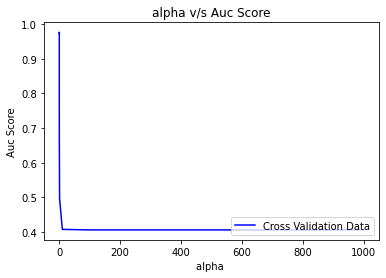

In [ ]:
a1 = svm_train(x_train_bow, x_cv_bow, y_train, y_cv, algo='Linear')

The accuracy of the model is: 97.67441860465115


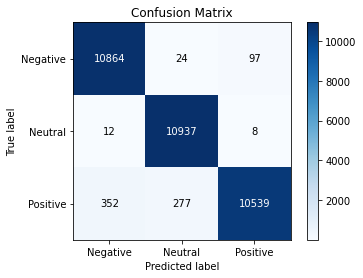

In [ ]:
b1 = svm_test(x_train_bow, y_train, x_test_bow, y_test, optimal_alpha=a1, algo='Linear')

        Alpha  Accuracy
0     0.00001  0.980469
1     0.00010  0.893587
2     0.00100  0.820665
3     0.01000  0.819457
4     0.10000  0.569885
5     1.00000  0.569885
6    10.00000  0.569885
7   100.00000  0.569885
8  1000.00000  0.569885


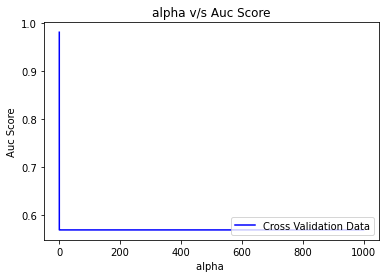

In [ ]:
a2 = svm_train(x_train_tfidf, x_cv_tfidf, y_train, y_cv, algo='Linear')

The accuracy of the model is: 98.05194805194806


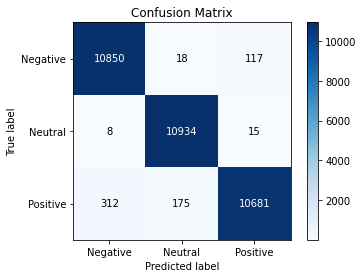

In [ ]:
b2 = svm_test(x_train_tfidf, y_train, x_test_tfidf, y_test, optimal_alpha=a2, algo='Linear')

In [ ]:
t = PrettyTable()
t.field_names = ["Model", "Hyperparameter", "Accuracy"]
t.add_row(["Linear SVM using BOW", a1, b1])
t.add_row([" Linear SVM using TF-idf", a2, b2])
print(t)

+--------------------------+----------------+-------------------+
|          Model           | Hyperparameter |      Accuracy     |
+--------------------------+----------------+-------------------+
|   Linear SVM using BOW   |     0.0001     | 97.67441860465115 |
|  Linear SVM using TF-idf |     1e-05      | 98.05194805194806 |
+--------------------------+----------------+-------------------+


---

## **Logistic Regression** 

---

In [ ]:
def logistic_train(x_train, x_cv, y_train, y_cv, penal):
    C = [10000,5000,1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001]
    accuracy_cv = []

    for i in C[0:]:
        logistic = LogisticRegression(penalty=penal, C=i)
        logistic.fit(x_train, y_train)
        prediction = logistic.predict(x_cv) 
        acc_cv = accuracy_score(y_cv, prediction)
        accuracy_cv.append(acc_cv)
    opt_C = C[accuracy_cv.index(max(accuracy_cv))]
    x = pd.DataFrame()
    x['Lambda'] = C
    x['Accuracy'] = accuracy_cv
    print(x)
    plt.plot(C, accuracy_cv, 'b-', label="Cross Validation Data")
    plt.legend(loc='lower right')
    plt.title("lamba v/s Auc Score")
    plt.ylabel('Auc Score')
    plt.xlabel('lambda')
    plt.show()  
    return opt_C

In [ ]:
def logistic_test(x_train, y_train, x_test, y_test, penal, optimal_C):
    logistic = LogisticRegression(penalty=penal, C=optimal_C)
    logistic.fit(x_train, y_train)
    prediction = logistic.predict(x_test)
    print("The accuracy of the model is:", accuracy_score(y_test, prediction)*100)
    
    plot_confusion_matrix(y_test, prediction)
    plt.show()
    return accuracy_score(y_test, prediction)*100

       Lambda  Accuracy
0   10000.000  0.971912
1    5000.000  0.971878
2    1000.000  0.971643
3     500.000  0.972012
4     100.000  0.971878
5      50.000  0.971408
6      10.000  0.970402
7       5.000  0.970502
8       1.000  0.970267
9       0.500  0.970066
10      0.100  0.963354
11      0.050  0.955535
12      0.010  0.896909
13      0.005  0.855599
14      0.001  0.748481


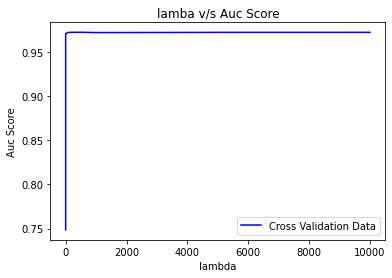

In [ ]:
a1 = logistic_train(x_train_bow, x_cv_bow, y_train, y_cv, penal='l2')

The accuracy of the model is: 97.37541528239203


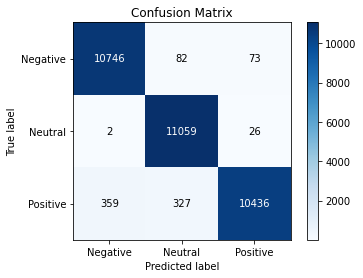

In [ ]:
b1 = logistic_test(x_train_bow, y_train, x_test_bow, y_test, penal='l2', optimal_C=a1)

       Lambda  Accuracy
0   10000.000  0.967784
1    5000.000  0.969865
2    1000.000  0.969026
3     500.000  0.968724
4     100.000  0.967314
5      50.000  0.968388
6      10.000  0.967516
7       5.000  0.961375
8       1.000  0.942246
9       0.500  0.919460
10      0.100  0.816202
11      0.050  0.771100
12      0.010  0.692238
13      0.005  0.671130
14      0.001  0.615289


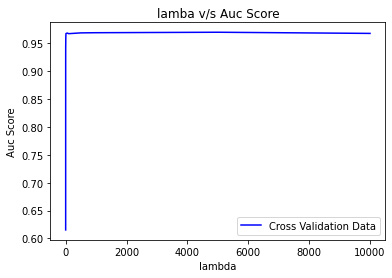

In [ ]:
a2 = logistic_train(x_train_tfidf, x_cv_tfidf, y_train, y_cv, penal='l2')

The accuracy of the model is: 97.1126547870734


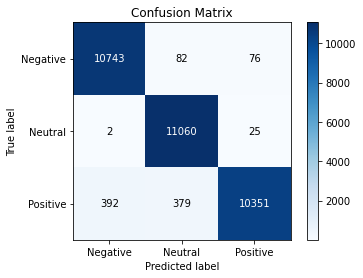

In [ ]:
b2 = logistic_test(x_train_tfidf, y_train, x_test_tfidf, y_test, penal='l2', optimal_C=a2)

In [ ]:
t = PrettyTable()
t.field_names = ["Model", "Hyperparameter", "Accuracy"]
t.add_row(["Logistic regression using BOW", a1, b1])
t.add_row(["Logistic regression using Tf-idf", a2, b2])
print(t)

+----------------------------------+----------------+-------------------+
|              Model               | Hyperparameter |      Accuracy     |
+----------------------------------+----------------+-------------------+
|  Logistic regression using BOW   |      500       | 97.37541528239203 |
| Logistic regression using Tf-idf |      5000      |  97.1126547870734 |
+----------------------------------+----------------+-------------------+


---

## **Decision Trees** 

---

In [ ]:
def dt_train(x_train, x_cv, y_train, y_cv):
    samples = [5, 10, 50, 100, 500]
    depth = [5, 10, 50, 100]
    accuracy_cv = []
    est = []
    dep = []

    for i in samples:
        for j in depth:
            dt = DecisionTreeClassifier(min_samples_split=i, max_depth=j)
            dt.fit(x_train, y_train)
            prediction = dt.predict(x_cv)
            acc_cv = accuracy_score(y_cv, prediction)
            accuracy_cv.append(acc_cv)
            est.append(i)
            dep.append(j)
    x = pd.DataFrame()
    x['Estimators'] = est
    x['Depth'] = dep
    x['Accuracy'] = accuracy_cv
    print(x)

In [ ]:
def dt_test(x_train, y_train, x_test, y_test, optimal_samples, optimal_depth):
    dt = DecisionTreeClassifier(min_samples_split=optimal_samples, max_depth=optimal_depth)
    dt.fit(x_train, y_train)
    prediction = dt.predict(x_test)
    print("The accuracy of the model is:", accuracy_score(y_test, prediction)*100)
    plot_confusion_matrix(y_test, prediction)
    plt.show()
    return accuracy_score(y_test, prediction)*100

In [ ]:
dt_train(x_train_bow, x_cv_bow, y_train, y_cv)

    Estimators  Depth  Accuracy
0            5      5  0.488372
1            5     10  0.557905
2            5     50  0.856035
3            5    100  0.905064
4           10      5  0.488372
5           10     10  0.557368
6           10     50  0.847881
7           10    100  0.895500
8           50      5  0.488305
9           50     10  0.555220
10          50     50  0.810296
11          50    100  0.848518
12         100      5  0.488204
13         100     10  0.551998
14         100     50  0.777979
15         100    100  0.813786
16         500      5  0.487802
17         500     10  0.539649
18         500     50  0.685761
19         500    100  0.711098


The accuracy of the model is: 90.83358501963154


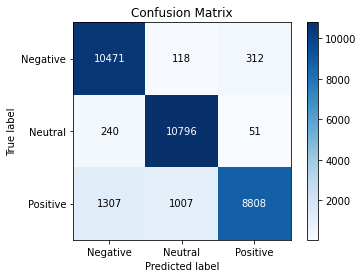

In [ ]:
b1 = dt_test(x_train_bow, y_train, x_test_bow, y_test, optimal_samples=5, optimal_depth=100)

In [ ]:
dt_train(x_train_tfidf, x_cv_tfidf, y_train, y_cv)

    Estimators  Depth  Accuracy
0            5      5  0.482600
1            5     10  0.558374
2            5     50  0.851404
3            5    100  0.896876
4           10      5  0.482634
5           10     10  0.558710
6           10     50  0.840230
7           10    100  0.884661
8           50      5  0.482634
9           50     10  0.557200
10          50     50  0.801873
11          50    100  0.840532
12         100      5  0.482197
13         100     10  0.553743
14         100     50  0.775060
15         100    100  0.809524
16         500      5  0.481862
17         500     10  0.546562
18         500     50  0.690694
19         500    100  0.715225


The accuracy of the model is: 89.975838115373


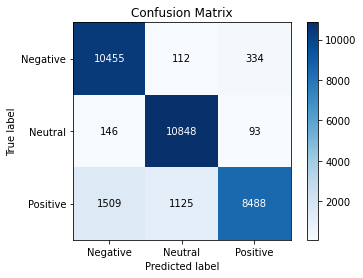

In [ ]:
b2 = dt_test(x_train_tfidf, y_train, x_test_tfidf, y_test, optimal_samples=5, optimal_depth=100)

In [ ]:
t = PrettyTable()
t.field_names = ["Model", "Hyperparameter", "Accuracy"]
t.add_row(["Decision tree using BOW", "Estimator and Depth - 100 and 5", "90.83358501963154"])
t.add_row(["Decision tree using Tf-idf", "Estimator and Depth - 100 and 5", "89.975838115373"])
print(t)

+----------------------------+---------------------------------+-------------------+
|           Model            |          Hyperparameter         |      Accuracy     |
+----------------------------+---------------------------------+-------------------+
|  Decision tree using BOW   | Estimator and Depth - 100 and 5 | 90.83358501963154 |
| Decision tree using Tf-idf | Estimator and Depth - 100 and 5 |  89.975838115373  |
+----------------------------+---------------------------------+-------------------+


---

## **Random Forest** 

---

In [ ]:
def rf_train(x_train, x_cv, y_train, y_cv):
    estimators = [5, 10, 50, 100, 500, 600]
    depth = [5, 10, 50, 100]
    accuracy_cv = []
    est = []
    dep = []

    for i in estimators:
        for j in depth:
            rf = RandomForestClassifier(n_estimators=i, max_depth=j, class_weight='balanced', n_jobs=-1)
            rf.fit(x_train, y_train)
            prediction = rf.predict(x_cv)
            acc_cv = accuracy_score(y_cv, prediction)
            est.append(i)
            dep.append(j)
            accuracy_cv.append(acc_cv)
    x = pd.DataFrame()
    x['Estimators'] = est
    x['Depth'] = dep
    x['Accuracy'] = accuracy_cv
    print(x)

In [ ]:
def rf_test(x_train, y_train, x_test, y_test, optimal_estimators, optimal_depth):
    rf = RandomForestClassifier(n_estimators=optimal_estimators, max_depth=optimal_depth, class_weight='balanced', n_jobs=-1)
    rf.fit(x_train, y_train)
    prediction = rf.predict(x_test)
    print("The accuracy of the model is:", accuracy_score(y_test, prediction)*100)
    
    plot_confusion_matrix(y_test, prediction)
    plt.show()
    return accuracy_score(y_test, prediction)*100

In [ ]:
rf_train(x_train_bow, x_cv_bow, y_train, y_cv)

    Estimators  Depth  Accuracy
0            5      5  0.386020
1            5     10  0.451223
2            5     50  0.679922
3            5    100  0.839458
4           10      5  0.445283
5           10     10  0.496057
6           10     50  0.760093
7           10    100  0.882244
8           50      5  0.571361
9           50     10  0.632102
10          50     50  0.854358
11          50    100  0.934058
12         100      5  0.620793
13         100     10  0.659787
14         100     50  0.863552
15         100    100  0.944025
16         500      5  0.662807
17         500     10  0.704990
18         500     50  0.877043
19         500    100  0.951206
20         600      5  0.678009
21         600     10  0.708010
22         600     50  0.875768
23         600    100  0.952415


The accuracy of the model is: 94.98338870431894


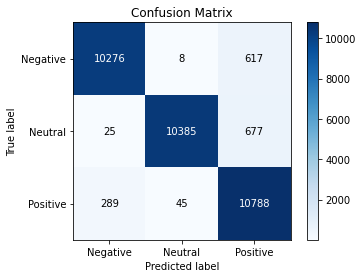

In [ ]:
b1 = rf_test(x_train_bow, y_train, x_test_bow, y_test, optimal_estimators=600, optimal_depth=100)

In [ ]:
rf_train(x_train_tfidf, x_cv_tfidf, y_train, y_cv)

    Estimators  Depth  Accuracy
0            5      5  0.406054
1            5     10  0.418202
2            5     50  0.666834
3            5    100  0.850733
4           10      5  0.435015
5           10     10  0.508171
6           10     50  0.760361
7           10    100  0.905366
8           50      5  0.572033
9           50     10  0.661029
10          50     50  0.890567
11          50    100  0.957616
12         100      5  0.622974
13         100     10  0.699688
14         100     50  0.899728
15         100    100  0.964026
16         500      5  0.678479
17         500     10  0.734958
18         500     50  0.914393
19         500    100  0.971811
20         600      5  0.687271
21         600     10  0.739555
22         600     50  0.913185
23         600    100  0.971341


The accuracy of the model is: 96.97674418604652


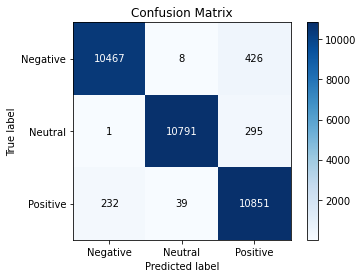

In [ ]:
b2 = rf_test(x_train_tfidf, y_train, x_test_tfidf, y_test, optimal_estimators=500, optimal_depth=100)

In [ ]:
t = PrettyTable()
t.field_names = ["Model", "Hyperparameter", "Accuracy"]
t.add_row(["Random forest using BOW", "Estimator and Depth - 600 and 100", b1])
t.add_row(["Random forest using Tf-idf", "Estimator and Depth - 500 and 100", b2])
print(t)

+----------------------------+-----------------------------------+-------------------+
|           Model            |           Hyperparameter          |      Accuracy     |
+----------------------------+-----------------------------------+-------------------+
|  Random forest using BOW   | Estimator and Depth - 600 and 100 | 94.98338870431894 |
| Random forest using Tf-idf | Estimator and Depth - 500 and 100 | 96.97674418604652 |
+----------------------------+-----------------------------------+-------------------+


---

## **K Nearest Neighbor** 

---

In [ ]:
def knn_train(x_train, x_cv, y_train, y_cv, algo):
    k = []
    accuracy_cv = []

    for i in range(2, 25, 2):
        neighbor = KNeighborsClassifier(n_neighbors=i, algorithm=algo)
        neighbor.fit(x_train, y_train)
        
        prediction = neighbor.predict(x_cv)
        
        acc_cv = accuracy_score(y_cv, prediction)
        k.append(i)
        accuracy_cv.append(acc_cv)
    opt_k = k[accuracy_cv.index(max(accuracy_cv))]
    x = pd.DataFrame()
    x['K'] = k
    x['Accuracy'] = accuracy_cv
    print(x)    
    
    plt.plot(k, accuracy_cv, 'b-', label="Cross Validation Data")
    plt.legend(loc='lower right')
    plt.title("K v/s Auc Score")
    plt.ylabel('Auc Score')
    plt.xlabel('K')
    plt.show()
    return opt_k

In [ ]:
def knn_test(x_train, y_train, x_test, y_test, algo, optimal_k):
    neighbor = KNeighborsClassifier(n_neighbors=optimal_k, algorithm=algo) 
    neighbor.fit(x_train, y_train)
    prediction = neighbor.predict(x_test)
    print("The accuracy of the model is:", accuracy_score(y_test, prediction)*100)
    
    plot_confusion_matrix(y_test, prediction)
    plt.show()
    return accuracy_score(y_test, prediction)*100

     K  Accuracy
0    2  0.767744
1    4  0.726199
2    6  0.690057
3    8  0.654686
4   10  0.620457
5   12  0.596966
6   14  0.577570
7   16  0.559784
8   18  0.568140
9   20  0.572704
10  22  0.572704
11  24  0.576999


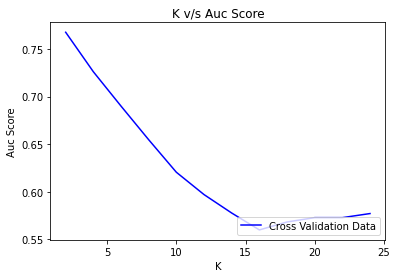

In [ ]:
a1 = knn_train(x_train_bow, x_cv_bow, y_train, y_cv, algo='brute')

The accuracy of the model is: 76.41800060404712


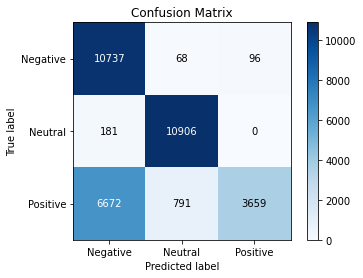

In [ ]:
b1 = knn_test(x_train_bow, y_train, x_test_bow, y_test, algo='brute', optimal_k=a1)

     K  Accuracy
0    2  0.856639
1    4  0.796973
2    6  0.746703
3    8  0.704285
4   10  0.678110
5   12  0.656029
6   14  0.643847
7   16  0.632773
8   18  0.626430
9   20  0.622571
10  22  0.617504
11  24  0.612403


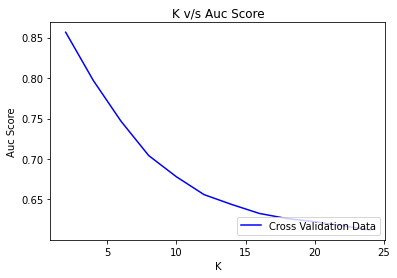

In [ ]:
a2 = knn_train(x_train_tfidf, x_cv_tfidf, y_train, y_cv, algo='brute')

The accuracy of the model is: 85.82301419510722


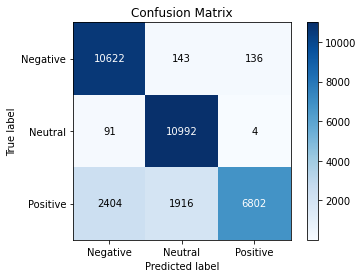

In [ ]:
b2 = knn_test(x_train_tfidf, y_train, x_test_tfidf, y_test, algo='brute', optimal_k=a2)

In [ ]:
t = PrettyTable()
t.field_names = ["Model", "Hyperparameter", "Accuracy"]
t.add_row(["KNN using BOW", a1, b1])
t.add_row(["KNN Tf-idf", a2, b2])
print(t)

+---------------+----------------+-------------------+
|     Model     | Hyperparameter |      Accuracy     |
+---------------+----------------+-------------------+
| KNN using BOW |       2        | 76.41800060404712 |
|   KNN Tf-idf  |       2        | 85.82301419510722 |
+---------------+----------------+-------------------+


---

## **Inference** 

---

In [ ]:
t = PrettyTable()
t.field_names = ["Model", "Hyperparameter", "Accuracy"]
t.add_row(["Multinomial Naive bayes using BOW", "alpha - 0.0001", "97.64421624886741"])
t.add_row(["Multinomial Naive bayes using Tf-idf", "alpha - 0.00005", "97.65327695560254"])
t.add_row(["Bernoulli Naive bayes using BOW", "alpha - 0.0001", "97.83449109030504"])
t.add_row(["Bernoulli Naive bayes using Tf-idf", "alpha - 0.0001", "97.83449109030504"])
t.add_row(["Linear SVM using BOW", "C - 0.0001", "97.67441860465115"])
t.add_row([" Linear SVM using TF-idf", "C - 0.00001", "98.05194805194806"])
t.add_row(["Logistic regression using BOW", "lambda - 500", "97.37541528239203"])
t.add_row(["Logistic regression using Tf-idf", "lamda - 5000", "97.1126547870734"])
t.add_row(["Decision tree using BOW", "Estimator and Depth - 100 and 5", "90.83358501963154"])
t.add_row(["Decision tree using Tf-idf", "Estimator and Depth - 100 and 5", "89.975838115373 "])
t.add_row(["Random forest using BOW", "Estimator and Depth - 600 and 100", "94.98338870431894"])
t.add_row(["Random forest using Tf-idf", "Estimator and Depth - 500 and 100", "96.97674418604652"])
t.add_row(["KNN using BOW", "k - 2", "76.41800060404712"])
t.add_row(["KNN Tf-idf", "k - 2", "85.82301419510722"])
print(t)

+--------------------------------------+-----------------------------------+-------------------+
|                Model                 |           Hyperparameter          |      Accuracy     |
+--------------------------------------+-----------------------------------+-------------------+
|  Multinomial Naive bayes using BOW   |           alpha - 0.0001          | 97.64421624886741 |
| Multinomial Naive bayes using Tf-idf |          alpha - 0.00005          | 97.65327695560254 |
|   Bernoulli Naive bayes using BOW    |           alpha - 0.0001          | 97.83449109030504 |
|  Bernoulli Naive bayes using Tf-idf  |           alpha - 0.0001          | 97.83449109030504 |
|         Linear SVM using BOW         |             C - 0.0001            | 97.67441860465115 |
|        Linear SVM using TF-idf       |            C - 0.00001            | 98.05194805194806 |
|    Logistic regression using BOW     |            lambda - 500           | 97.37541528239203 |
|   Logistic regression using 

### The main objective was to do sentiment analysis on various Machine learning models, among all the machine learning models used Support Vector machine using Tf-idf vectorization performed well with 98% accuracy.